In [5]:
import pandas as pd
import numpy as np

# Jeu de données videogames trouvé sur le site Data World
# URL : https://data.world/sumitrock/videogames

# Import du jeu de données

videogames = pd.read_csv("Video_Games.csv", delimiter = ';')
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
videogames.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
#  Verification Nombre de valeurs manquantes

videogames.isna().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [10]:
# Renommer colonne Year_of_Release en Year

videogames = videogames.rename(columns={'Year_of_Release': 'Year'})

print(videogames["Year"])

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2016.0
16715    2006.0
16716    2016.0
16717    2003.0
16718    2016.0
Name: Year, Length: 16719, dtype: float64


# Fusion de videogames avec vgsales

In [12]:
# Jeu de données d'origine, issu de Kaggle

# Import du jeu de données vgsales

vgsales = pd.read_csv("vgsales.csv")

vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# Sélection des colonnes de videogames à fusionner

columnsfusion = ["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating", "Name"]
dfusion = videogames[columnsfusion]

# Fusion des colonnes videogames avec vgsales avec comme clé commune Name
# Merge nommé df1

df1 = pd.merge(vgsales, dfusion, on='Name', how='left')

df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,Nintendo,E


In [14]:
print(df1.isna().sum())
print("--------------------------------")
print("Nombre de doublons est de", df1.duplicated().sum())
print("--------------------------------")
print(df1.info())

Rank                0
Name                0
Platform            0
Year              635
Genre               0
Publisher          68
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score    14770
Critic_Count    14770
User_Score      10143
User_Count      15290
Developer       10000
Rating          10257
dtype: int64
--------------------------------
Nombre de doublons est de 3397
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35200 entries, 0 to 35199
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          35200 non-null  int64  
 1   Name          35200 non-null  object 
 2   Platform      35200 non-null  object 
 3   Year          34565 non-null  float64
 4   Genre         35200 non-null  object 
 5   Publisher     35132 non-null  object 
 6   NA_Sales      35200 non-null  float64
 7   EU_Sales      3

In [15]:
doublons = df1[df1.duplicated(keep=False)]

# Identifier les doublons sur toutes les colonnes du merge "df1"

doublons = df1.duplicated(subset=["Name",	"Platform", "Year",	"Genre", "Publisher",	"NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales", "Global_Sales"])

# Éliminer les doublons en gardant la première occurrence

###################### Merge sans doublons nommé "dfvg" !

dfvg = df1[~doublons]

# Vérification

print(dfvg.isna().sum())
print("--------------------------------")
print("Nombre de doublons est de", dfvg.duplicated().sum())

Rank               0
Name               0
Platform           0
Year             270
Genre              0
Publisher         58
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8261
Critic_Count    8261
User_Score      6624
User_Count      8760
Developer       6556
Rating          6687
dtype: int64
--------------------------------
Nombre de doublons est de 0


In [16]:
dfvg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,Nintendo,E
5,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dfvg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 0 to 35198
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16597 non-null  int64  
 1   Name          16597 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16597 non-null  object 
 5   Publisher     16539 non-null  object 
 6   NA_Sales      16597 non-null  float64
 7   EU_Sales      16597 non-null  float64
 8   JP_Sales      16597 non-null  float64
 9   Other_Sales   16597 non-null  float64
 10  Global_Sales  16597 non-null  float64
 11  Critic_Score  8336 non-null   float64
 12  Critic_Count  8336 non-null   float64
 13  User_Score    9973 non-null   object 
 14  User_Count    7837 non-null   float64
 15  Developer     10041 non-null  object 
 16  Rating        9910 non-null   object 
dtypes: float64(9), int64(1), object(7)
memory usage: 2.3+ MB


In [18]:
# Identifier les valeurs manquantes dans la colonne Year

valeurs_manquantes = dfvg[dfvg["Year"].isna()]
colonne = "Year"

# Boucle pour afficher les lignes contenant des valeurs manquantes

for index, row in valeurs_manquantes.iterrows():
    print(f"Index: {index}, Ligne complète: \n{row}\n")

Index: 395, Ligne complète: 
Rank                        180
Name            Madden NFL 2004
Platform                    PS2
Year                        NaN
Genre                    Sports
Publisher       Electronic Arts
NA_Sales                   4.26
EU_Sales                   0.26
JP_Sales                   0.01
Other_Sales                0.71
Global_Sales               5.23
Critic_Score               94.0
Critic_Count               29.0
User_Score                  8.5
User_Count                140.0
Developer            EA Tiburon
Rating                        E
Name: 395, dtype: object

Index: 937, Ligne complète: 
Rank                         378
Name            FIFA Soccer 2004
Platform                     PS2
Year                         NaN
Genre                     Sports
Publisher        Electronic Arts
NA_Sales                    0.59
EU_Sales                    2.36
JP_Sales                    0.04
Other_Sales                 0.51
Global_Sales                3.49
Critic_Sc

In [19]:
# Remplacement à la main d'une valeur manquante

dfvg.at[395, "Year"] = 2003

# Vérification

print(dfvg["Year"][395])

2003.0


In [20]:
# Remplacement des valeurs manquantes par les valeurs réelles trouvées sur les sites Metacritic et SensCritique

dfvg.at[937, "Year"] = 2003
dfvg.at[1067, "Year"] = 2008
dfvg.at[1173, "Year"] = 2005
dfvg.at[1173, "Publisher"] = "THQ"
dfvg.at[1173, "Critic_Score"] = 84
dfvg.at[1173, "Critic_Count"] = 45
dfvg.at[1173, "User_Score"] = 8.2
dfvg.at[1173, "User_Count"] = 93
dfvg.at[1173, "Developer"] = "Yuke's"
dfvg.at[1173, "Rating"] = "T"
dfvg.at[1528, "Year"] = 1978
dfvg.at[1580, "Year"] = 2007
dfvg.at[1642, "Year"] = 2001
dfvg.at[1642, "User_Score"] = 8.0
dfvg.at[1642, "User_Count"] = 7
dfvg.at[1649, "Year"] = 2008
dfvg.at[1833, "Year"] = 2006
dfvg.at[2001, "Year"] = 2007
dfvg.at[2849, "Year"] = 2010
dfvg.at[2874, "Year"] = 2007
dfvg.at[3274, "Year"] = 1998
dfvg.at[3613, "Year"] = 2011
dfvg.at[3799, "Year"] = 2008
dfvg.at[3837, "Year"] = 1980
dfvg.at[3837, "User_Score"] = 7.1
dfvg.at[3837, "User_Count"] = 64
dfvg.at[3837, "Developer"] = "Warren Robinett"
dfvg.at[4026, "Year"] = 1977
dfvg.at[4026, "User_Score"] = 5.8
dfvg.at[4026, "User_Count"] = 32
dfvg.at[4180, "Year"] = 2002
dfvg.at[4304, "Year"] = 2002
dfvg.at[4649, "Year"] = 2007
dfvg.at[5031, "Year"] = 1999
dfvg.at[5115, "Year"] = 1997
dfvg.at[5115, "User_Score"] = 6.8
dfvg.at[5115, "User_Count"] = 144
dfvg.at[5115, "Developer"] = "Rare"
dfvg.at[5115, "Rating"] = "E"
dfvg.at[5292, "Year"] = 2011
dfvg.at[5390, "Year"] = 1977
dfvg.at[5390, "User_Score"] = 4.9
dfvg.at[5390, "User_Count"] = 15
dfvg.at[5390, "Developer"] = "Larry Kaplan"
dfvg.at[5391, "Year"] = 2002
dfvg.at[5391, "Publisher"] = "Konami"
dfvg.at[5457, "Year"] = 2011
dfvg.at[5496, "Year"] = 2011
dfvg.at[5572, "Year"] = 2003
dfvg.at[5572, "Publisher"] = "Atari"
dfvg.at[5572, "Rating"] = "E"
dfvg.at[5894, "Year"] = 2002
dfvg.at[5894, "Publisher"] = "Namco"
dfvg.at[5928, "Year"] = 2009
dfvg.at[5928, "Publisher"] = "Nintendo"
dfvg.at[6222, "Year"] = 2011
dfvg.at[6235, "Year"] = 2011
dfvg.at[6408, "Year"] = 2006
dfvg.at[6408, "Publisher"] = "EA Tiburon"
dfvg.at[6436, "Year"] = 2002
dfvg.at[6436, "Publisher"] = "Midway"
dfvg.at[6517, "Year"] = 2008
dfvg.at[6671, "Year"] = 2009
dfvg.at[6671, "Critic_Score"] = 77
dfvg.at[6671, "Critic_Count"] = 34
dfvg.at[6671, "User_Score"] = 6.5
dfvg.at[6671, "User_Count"] = 35
dfvg.at[6671, "Developer"] = "KCET"
dfvg.at[6671, "Rating"] = "E"
dfvg.at[7180, "Year"] = 2010
dfvg.at[7180, "Publisher"] = "Electronic Arts"
dfvg.at[7204, "Year"] = 2005
dfvg.at[7204, "Publisher"] = "Nintendo"
dfvg.at[6671, "Critic_Score"] = 88
dfvg.at[6671, "Critic_Count"] = 39
dfvg.at[6671, "User_Score"] = 8.6
dfvg.at[6671, "User_Count"] = 39
dfvg.at[6671, "Developer"] = "Nintendo"
dfvg.at[6671, "Rating"] = "E"
dfvg.at[7345, "Year"] = 2011
dfvg.at[7638, "Year"] = 2011
dfvg.at[7903, "Year"] = 2005
dfvg.at[8154, "Year"] = 2011
dfvg.at[8310, "Year"] = 2006
dfvg.at[8310, "Developer"] = "Capcom"
dfvg.at[8374, "Year"] = 2008
dfvg.at[8424, "Year"] = 2002
dfvg.at[8705, "Year"] = 2007
dfvg.at[8909, "Year"] = 2005
dfvg.at[9039, "Year"] = 2002
dfvg.at[9039, "Publisher"] = "Infogrames"
dfvg.at[9101, "Year"] = 2001
dfvg.at[9101, "Publisher"] = "EA Sports"
dfvg.at[9639, "Year"] = 2004
dfvg.at[9730, "Year"] = 2003
dfvg.at[10048, "Year"] = 1980
dfvg.at[10048, "User_Score"] = 6.1
dfvg.at[10048, "User_Count"] = 6
dfvg.at[10048, "Developer"] = "Activision"
dfvg.at[10048, "Rating"] = "E"
dfvg.at[10234, "Year"] = 2009
dfvg.at[10770, "Year"] = 2007
dfvg.at[10770, "Publisher"] = "Sega"
dfvg.at[10770, "Critic_Score"] = 77
dfvg.at[10770, "Critic_Count"] = 11
dfvg.at[10770, "User_Score"] = 7.8
dfvg.at[10770, "User_Count"] = 104
dfvg.at[10770, "Developer"] = "Backbone Entertainment"
dfvg.at[10770, "Rating"] = "E"
dfvg.at[10780, "Year"] = 1982
dfvg.at[10780, "Developer"] = "Froggo Games"
dfvg.at[10889, "Year"] = 2006
dfvg.at[10969, "Year"] = 1980
dfvg.at[10969, "Developer"] = "Atari"
dfvg.at[11218, "Year"] = 2004
dfvg.at[11344, "Year"] = 1980
dfvg.at[11347, "Year"] = 2008
dfvg.at[11559, "Year"] = 1981
dfvg.at[11559, "User_Score"] = 6.7
dfvg.at[11559, "User_Count"] = 26
dfvg.at[11559, "Developer"] = "Ed Rotberg"
dfvg.at[11563, "Year"] = 2008
dfvg.at[11722, "Year"] = 2010
dfvg.at[12086, "Year"] = 2012
dfvg.at[12086, "Publisher"] = "En Masse Entertainment"
dfvg.at[12382, "Year"] = 2011
dfvg.at[12410, "Year"] = 2002
dfvg.at[12410, "Publisher"] = "SCEA"
dfvg.at[12575, "Year"] = 2008
dfvg.at[12591, "Year"] = 2001
dfvg.at[12591, "Publisher"] = "Natsume"
dfvg.at[12774, "Year"] = 2008
dfvg.at[13082, "Year"] = 1978
dfvg.at[13082, "Developer"] = "Alan Miller"
dfvg.at[13118, "Year"] = 2007
dfvg.at[13346, "Year"] = 2002
dfvg.at[13368, "Year"] = 2010
dfvg.at[13423, "Year"] = 2002
dfvg.at[13423, "Publisher"] = "3DO"
dfvg.at[13423, "Developer"] = "Blitz Games"
dfvg.at[13424, "Year"] = 2011
dfvg.at[13518, "Year"] = 2013
dfvg.at[13518, "Critic_Score"] = 86
dfvg.at[13518, "Critic_Count"] = 18
dfvg.at[13518, "User_Score"] = 8.4
dfvg.at[13518, "User_Count"] = 998
dfvg.at[13518, "Developer"] = "Crystal Dynamics"
dfvg.at[13518, "Rating"] = "AO"
dfvg.at[13652, "Year"] = 2006
dfvg.at[13652, "Publisher"] = "Atari SA"
dfvg.at[13652, "Critic_Score"] = 72
dfvg.at[13652, "Critic_Count"] = 37
dfvg.at[13652, "User_Score"] = 8.6
dfvg.at[13652, "User_Count"] = 43
dfvg.at[13652, "Developer"] = "Spike"
dfvg.at[13652, "Rating"] = "T"
dfvg.at[14148, "Year"] = 1999
dfvg.at[14415, "Year"] = 2004
dfvg.at[14415, "Publisher"] = "SCEA"
dfvg.at[14429, "Year"] = 2010
dfvg.at[14429, "Publisher"] = "Activision"
dfvg.at[14495, "Year"] = 1980
dfvg.at[14495, "Developer"] = "Activision"

In [21]:
# Affichage des lignes avec des valeurs manquantes

for index, row in valeurs_manquantes.iterrows():
    print(f"Index: {index}, Ligne complète: \n{row}\n")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Index: 5031, Ligne complète: 
Rank                                   1992
Name            Legacy of Kain: Soul Reaver
Platform                                 PS
Year                                    NaN
Genre                                Action
Publisher                 Eidos Interactive
NA_Sales                               0.58
EU_Sales                                0.4
JP_Sales                                0.0
Other_Sales                            0.07
Global_Sales                           1.04
Critic_Score                           91.0
Critic_Count                           17.0
User_Score                                9
User_Count                            132.0
Developer                  Crystal Dynamics
Rating                                    T
Name: 5031, dtype: object

Index: 5115, Ligne complète: 
Rank                            2021
Name            Donkey Kong Land III
Platform     

In [22]:
# Tri par valeurs et par ordre croissant de Year

dfvg['Year'].value_counts().sort_index()

,count
Year,
1977.0,2
1978.0,2
1980.0,14
1981.0,47
1982.0,37
1983.0,17
1984.0,14
1985.0,14
1986.0,21


# DataViz dataset vgsales

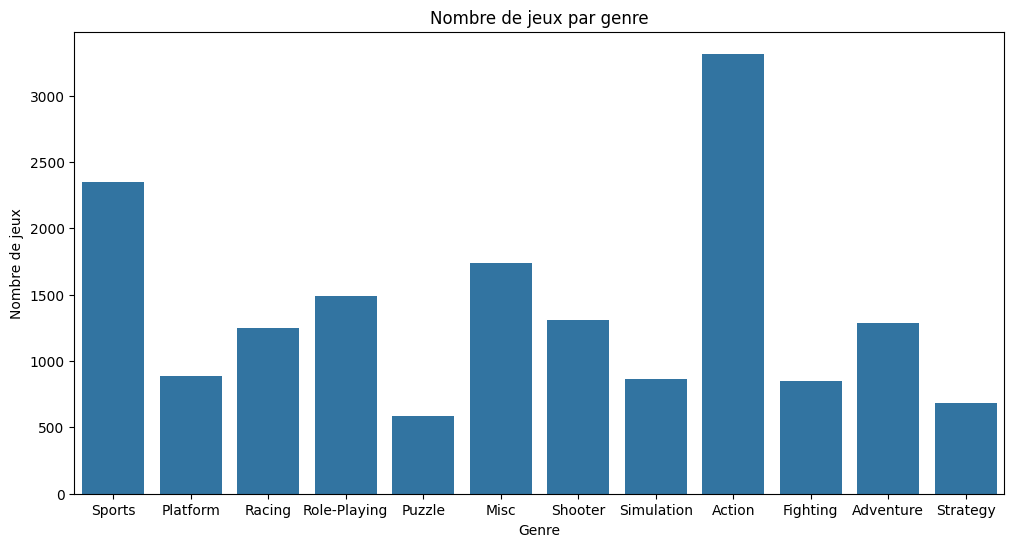

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# COUNPLOT
# Nombre de jeux par Genre

plt.figure(figsize = (12, 6))

sns.countplot(x = 'Genre', data = dfvg)

plt.xlabel('Genre')
plt.ylabel('Nombre de jeux')
plt.title('Nombre de jeux par genre')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

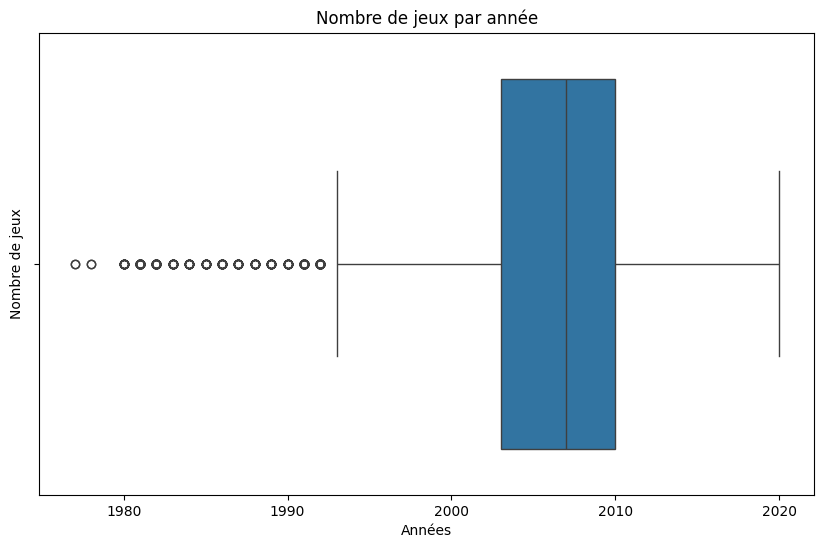

In [26]:
# BOXPLOT
# Nombre de jeux par Année

plt.figure(figsize = (10, 6))

sns.boxplot(x = "Year", data = dfvg)

plt.xlabel('Années')
plt.ylabel('Nombre de jeux')
plt.title('Nombre de jeux par année')

plt.show

<Figure size 1000x600 with 0 Axes>

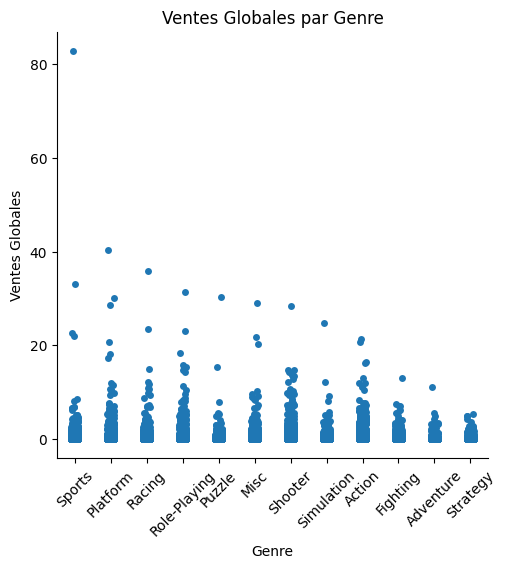

In [27]:
# STRIP PLOT
# Ventes Globales par Année

plt.figure(figsize = (10, 6))

sns.catplot(x = "Genre", y = "Global_Sales", data = dfvg)
plt.xticks(rotation = 45)

plt.xlabel('Genre')
plt.ylabel('Ventes Globales')
plt.title('Ventes Globales par Genre')

plt.show()

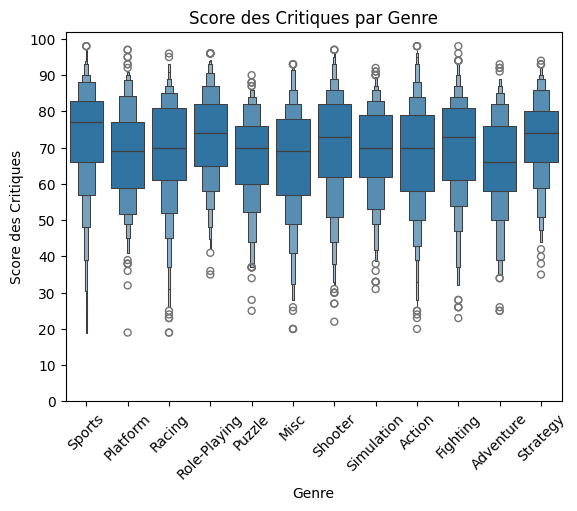

In [30]:
# BOXENPLOT
# Score des Critiques par Genre

sns.boxenplot(x = "Genre", y = "Critic_Score", data = dfvg)

plt.xlabel('Genre')
plt.ylabel('Score des Critiques')
plt.xticks(rotation = 45)
plt.yticks(range(0, 101, 10))
plt.title('Score des Critiques par Genre')

plt.show()

# Test Téléchargement du merge

In [31]:
# Test du téléchargement/de l'exportation du merge

# from google.colab import files
# dfvg.to_csv('mergetest.csv')
# files.download('mergetest.csv')

# Import du merge (cleanfusion) de vgsales.csv et de all_video_games.csv

In [34]:
# Import du merge de vgsales et all_video_games
# Le fichier all_video_games.csv provient de Kaggle
# URL : https://www.kaggle.com/datasets/beridzeg45/video-games

cleanfusion = pd.read_csv("cleanfusion.csv", delimiter = ';')
cleanfusion.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,User_Score,User_Count,Rating
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,7.9,474.0,E
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,8.3,138.0,E
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,8.6,1073.0,E
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,8.4,334.0,E
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [35]:
cleanfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16598 non-null  int64  
 1   Rank          16598 non-null  int64  
 2   Name          16598 non-null  object 
 3   Platform      16598 non-null  object 
 4   Year          16327 non-null  float64
 5   Genre         16598 non-null  object 
 6   Publisher     16540 non-null  object 
 7   NA_Sales      16598 non-null  float64
 8   EU_Sales      16598 non-null  float64
 9   JP_Sales      16598 non-null  float64
 10  Other_Sales   16598 non-null  float64
 11  Global_Sales  16598 non-null  float64
 12  Developer     7538 non-null   object 
 13  User_Score    6498 non-null   float64
 14  User_Count    6215 non-null   float64
 15  Rating        7463 non-null   object 
dtypes: float64(8), int64(2), object(6)
memory usage: 2.0+ MB


In [36]:
cleanfusion.isna().sum()

,0
Unnamed: 0,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0


# Fusion et nettoyage de dfvg (vgsales) et cleanfusion (all_video_games)

In [37]:
# Fusionner dfvg et cleanfusion sur la colonne Name avec des suffixes personnalisés

cf_merged = pd.merge(dfvg, cleanfusion, on='Name', how='outer', suffixes=('_dfvg', '_cleanfusion'))

# Liste des colonnes dupliquées à combiner

columns_to_combine = ["Platform", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Developer", "User_Score", "User_Count", "Rating"]  # Ajout de toutes les colonnes à vérifier

for col in columns_to_combine:
    # Combiner les colonnes dupliquées
    cf_merged[col] = cf_merged[f"{col}_dfvg"].combine_first(cf_merged[f"{col}_cleanfusion"])
    # Supprimer les colonnes dupliquées après combinaison
    cf_merged.drop(columns=[f"{col}_dfvg", f"{col}_cleanfusion"], inplace=True)

cf_merged = cf_merged.sort_values(by='Rank_dfvg')
cf_merged.head()

,Rank_dfvg,Name,Critic_Score,Critic_Count,Unnamed: 0,Rank_cleanfusion,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,User_Score,User_Count,Rating
33992,1.0,Wii Sports,76.0,51.0,0.0,1.0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,8,322.0,E
28059,2.0,Super Mario Bros.,NaN,NaN,1.0,2.0,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,8.3,138.0,E
28060,2.0,Super Mario Bros.,NaN,NaN,200.0,201.0,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,8.3,138.0,E
16629,3.0,Mario Kart Wii,82.0,73.0,2.0,3.0,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,8.3,709.0,E
33994,4.0,Wii Sports Resort,80.0,73.0,3.0,4.0,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,8,192.0,E


In [38]:
print(cf_merged.info())
print("--------------------------------")
print(cf_merged.isna().sum())
print("--------------------------------")
print(cf_merged.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 35229 entries, 33992 to 2855
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank_dfvg         35228 non-null  float64
 1   Name              35229 non-null  object 
 2   Critic_Score      21702 non-null  float64
 3   Critic_Count      21702 non-null  float64
 4   Unnamed: 0        35228 non-null  float64
 5   Rank_cleanfusion  35228 non-null  float64
 6   Platform          35229 non-null  object 
 7   Year              34978 non-null  float64
 8   Genre             35229 non-null  object 
 9   Publisher         35174 non-null  object 
 10  NA_Sales          35229 non-null  float64
 11  EU_Sales          35229 non-null  float64
 12  JP_Sales          35229 non-null  float64
 13  Other_Sales       35229 non-null  float64
 14  Global_Sales      35229 non-null  float64
 15  Developer         26762 non-null  object 
 16  User_Score        26560 non-null  object 


In [39]:
# Supprimer les doublons et conserver la première occurrence basés sur les colonnes Name, Platform et Year

cf_unique = cf_merged.drop_duplicates(subset=['Name', 'Platform', 'Year'], keep='first')
print(cf_unique)

       Rank_dfvg                                               Name  \
33992        1.0                                         Wii Sports   
28059        2.0                                  Super Mario Bros.   
16629        3.0                                     Mario Kart Wii   
33994        4.0                                  Wii Sports Resort   
22104        5.0                           Pokemon Red/Pokemon Blue   
...          ...                                                ...   
17213    16597.0                      Men in Black II: Alien Escape   
24650    16598.0   SCORE International Baja 1000: The Official Game   
13730    16599.0                                         Know How 2   
27139    16600.0                                   Spirits & Spells   
2855         NaN  Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...   

       Critic_Score  Critic_Count  Unnamed: 0  Rank_cleanfusion Platform  \
33992          76.0          51.0         0.0               1.0      Wi

In [ ]:
cf_unique.head()

,Rank_dfvg,Name,Critic_Score,Critic_Count,Unnamed: 0,Rank_cleanfusion,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,User_Score,User_Count,Rating
0,1,Wii Sports,76.0,51.0,0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,8,322.0,E
1,2,Super Mario Bros.,NaN,NaN,1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,8.3,138.0,E
5,3,Mario Kart Wii,82.0,73.0,2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,8.3,709.0,E
6,4,Wii Sports Resort,80.0,73.0,3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,8,192.0,E
7,5,Pokemon Red/Pokemon Blue,NaN,NaN,4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [40]:
cf_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16683 entries, 33992 to 2855
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank_dfvg         16682 non-null  float64
 1   Name              16683 non-null  object 
 2   Critic_Score      8403 non-null   float64
 3   Critic_Count      8403 non-null   float64
 4   Unnamed: 0        16682 non-null  float64
 5   Rank_cleanfusion  16682 non-null  float64
 6   Platform          16683 non-null  object 
 7   Year              16494 non-null  float64
 8   Genre             16683 non-null  object 
 9   Publisher         16629 non-null  object 
 10  NA_Sales          16683 non-null  float64
 11  EU_Sales          16683 non-null  float64
 12  JP_Sales          16683 non-null  float64
 13  Other_Sales       16683 non-null  float64
 14  Global_Sales      16683 non-null  float64
 15  Developer         10777 non-null  object 
 16  User_Score        10650 non-null  object 


In [42]:
# Nouvel ordre des colonnes

new_order = ["Name", "Platform", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"]

# Réorganiser les colonnes du DataFrame

cf = cf_unique[new_order]
cf.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
33992,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,Nintendo,E
28059,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,8.3,138.0,Nintendo,E
16629,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,Nintendo,E
33994,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,Nintendo,E
22104,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
print(cf.info())
print("--------------------------------")
print(cf.isna().sum())
print("--------------------------------")
print(cf.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16683 entries, 33992 to 2855
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16683 non-null  object 
 1   Platform      16683 non-null  object 
 2   Year          16494 non-null  float64
 3   Genre         16683 non-null  object 
 4   Publisher     16629 non-null  object 
 5   NA_Sales      16683 non-null  float64
 6   EU_Sales      16683 non-null  float64
 7   JP_Sales      16683 non-null  float64
 8   Other_Sales   16683 non-null  float64
 9   Global_Sales  16683 non-null  float64
 10  Critic_Score  8403 non-null   float64
 11  Critic_Count  8403 non-null   float64
 12  User_Score    10650 non-null  object 
 13  User_Count    8679 non-null   float64
 14  Developer     10777 non-null  object 
 15  Rating        10643 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.2+ MB
None
--------------------------------
Name               0
Platform

In [44]:
# Vérification des différences de NaN et de doublons entre le nouveau jeu de données merge et dfvg

print(dfvg.info())
print("--------------------------------")
print(dfvg.isna().sum())
print("--------------------------------")
print(dfvg.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 0 to 35198
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16597 non-null  int64  
 1   Name          16597 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16408 non-null  float64
 4   Genre         16597 non-null  object 
 5   Publisher     16542 non-null  object 
 6   NA_Sales      16597 non-null  float64
 7   EU_Sales      16597 non-null  float64
 8   JP_Sales      16597 non-null  float64
 9   Other_Sales   16597 non-null  float64
 10  Global_Sales  16597 non-null  float64
 11  Critic_Score  8341 non-null   float64
 12  Critic_Count  8341 non-null   float64
 13  User_Score    9984 non-null   object 
 14  User_Count    7849 non-null   float64
 15  Developer     10057 non-null  object 
 16  Rating        9918 non-null   object 
dtypes: float64(9), int64(1), object(7)
memory usage: 2.8+ MB
None
------------

# Fusion de cdmerge (Cleaned_Data) avec notre jeu de données merge (cf)


In [47]:
# Jeu de données Cleaned_Data trouvé sur Kaggle
# URL : https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings

cdmerge = pd.read_csv("cdmerge.csv",delimiter = ';')
cdmerge.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Suppression des colonnes Unnamed: 0 et Rank

cdmerge.drop(columns=["Rank"], inplace=True)
cdmerge.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
print(cdmerge.isna().sum())
print("----------------")
print(cdmerge.head())

Unnamed: 0          0
Name                0
Platform         2890
Year              271
Genre               0
Publisher          58
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score    12585
Critic_Count    12585
User_Score      12585
User_Count      12585
Developer       12589
Rating          12653
dtype: int64
----------------
   Unnamed: 0                      Name Platform    Year         Genre  \
0           0                Wii Sports      Wii  2006.0        Sports   
1           1         Super Mario Bros.      NES  1985.0      Platform   
2           2            Mario Kart Wii      Wii  2008.0        Racing   
3           3         Wii Sports Resort      Wii  2009.0        Sports   
4           4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.49     29.02      3.77         8.46         82.74   
1  Nint

In [50]:
# Créer une nouvelle colonne d'indexation

cdmerge['Index'] = range(1, len(cdmerge) + 1)

# Réorganiser les colonnes pour que la nouvelle colonne soit à la première position

cols_cdmerge = ['Index'] + [col for col in cdmerge.columns if col != 'Index']
cdmerge = cdmerge[cols_cdmerge]

print(cdmerge)

       Index  Unnamed: 0                        Name Platform    Year  \
0          1           0                  Wii Sports      Wii  2006.0   
1          2           1           Super Mario Bros.      NES  1985.0   
2          3           2              Mario Kart Wii      Wii  2008.0   
3          4           3           Wii Sports Resort      Wii  2009.0   
4          5           4    Pokemon Red/Pokemon Blue       GB  1996.0   
...      ...         ...                         ...      ...     ...   
19488  19489       19488                        Zubo      NaN  2008.0   
19489  19490       19489               Zumba Fitness      NaN  2010.0   
19490  19491       19490  Zumba Fitness: World Party      NaN  2013.0   
19491  19492       19491          Zumba Fitness Core      NaN  2012.0   
19492  19493       19492          Zumba Fitness Rush      NaN  2012.0   

              Genre              Publisher  NA_Sales  EU_Sales  JP_Sales  \
0            Sports               Nintendo     

In [51]:
# Fusionner cf et cdmerge sur la colonne Name avec des suffixes personnalisés

dfinal = pd.merge(cf, cdmerge, on='Name', how='outer', suffixes=('_cf', '_cdmerge'))

# Liste des colonnes dupliquées à combiner

columns_to_combine2 = ["Platform", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Critic_Score", "Critic_Count", "Developer", "User_Score", "User_Count", "Rating"]  # Ajout de toutes les colonnes à vérifier

for col in columns_to_combine2:
    # Combiner les colonnes dupliquées
    dfinal[col] = dfinal[f"{col}_cf"].combine_first(dfinal[f"{col}_cdmerge"])
    # Supprimer les colonnes dupliquées après combinaison
    dfinal.drop(columns=[f"{col}_cf", f"{col}_cdmerge"], inplace=True)

dfinal = dfinal.sort_values(by='Index')
dfinal.head()

,Name,Index,Unnamed: 0,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,User_Score,User_Count,Rating
42229,Wii Sports,1.0,0.0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,Nintendo,8,322.0,E
34847,Super Mario Bros.,2.0,1.0,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Nintendo,8.3,138.0,E
34849,Super Mario Bros.,2.0,1.0,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Nintendo,8.3,138.0,E
20832,Mario Kart Wii,3.0,2.0,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,Nintendo,8.3,709.0,E
42233,Wii Sports Resort,4.0,3.0,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,Nintendo,8,192.0,E


In [52]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43675 entries, 42229 to 3532
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          43675 non-null  object 
 1   Index         43674 non-null  float64
 2   Unnamed: 0    43674 non-null  float64
 3   Platform      43604 non-null  object 
 4   Year          43424 non-null  float64
 5   Genre         43675 non-null  object 
 6   Publisher     43621 non-null  object 
 7   NA_Sales      43675 non-null  float64
 8   EU_Sales      43675 non-null  float64
 9   JP_Sales      43675 non-null  float64
 10  Other_Sales   43675 non-null  float64
 11  Global_Sales  43675 non-null  float64
 12  Critic_Score  30568 non-null  float64
 13  Critic_Count  30568 non-null  float64
 14  Developer     35270 non-null  object 
 15  User_Score    35065 non-null  object 
 16  User_Count    31561 non-null  float64
 17  Rating        35048 non-null  object 
dtypes: float64(11), object(7)
me

In [53]:
print(dfinal.isna().sum())
print("--------------------------------")
print(dfinal.duplicated().sum())

Name                0
Index               1
Unnamed: 0          1
Platform           71
Year              251
Genre               0
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score    13107
Critic_Count    13107
Developer        8405
User_Score       8610
User_Count      12114
Rating           8627
dtype: int64
--------------------------------
155


In [54]:
# Suppression des doublons

dfinal = dfinal.drop_duplicates()

# Vérification

print(dfinal.duplicated().sum())

0


In [55]:
dfinal.head(20)

,Name,Index,Unnamed: 0,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,User_Score,User_Count,Rating
42229,Wii Sports,1.0,0.0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,Nintendo,8,322.0,E
34847,Super Mario Bros.,2.0,1.0,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Nintendo,8.3,138.0,E
34849,Super Mario Bros.,2.0,1.0,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Nintendo,8.3,138.0,E
20832,Mario Kart Wii,3.0,2.0,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,Nintendo,8.3,709.0,E
42233,Wii Sports Resort,4.0,3.0,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,Nintendo,8,192.0,E
27520,Pokemon Red/Pokemon Blue,5.0,4.0,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
35969,Tetris,6.0,5.0,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58,NaN,NaN,NaN,NaN,NaN,NaN
35967,Tetris,6.0,5.0,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
25848,New Super Mario Bros.,7.0,6.0,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,Nintendo,8.5,431.0,E
42225,Wii Play,8.0,7.0,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,Nintendo,6.6,129.0,E


In [56]:
doublons_dfinal = dfinal[dfinal.duplicated(keep=False)]

# Identifier les doublons sur toutes les colonnes du merge "df1"

doublons_dfinal = dfinal.duplicated(subset=["Name",	"Platform", "Year",	"Genre", "Publisher",	"NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales", "Global_Sales"])

print(doublons_dfinal)

42229    False
34847    False
34849    False
20832    False
42233    False
         ...  
43543     True
43532     True
43535     True
43537     True
3532     False
Length: 43520, dtype: bool


In [57]:
# Vérification des doublons par colonnes

nombre_doublons_subset = dfinal.duplicated(subset=['Name', 'Platform', 'Year']).sum()
print(f"Nombre de doublons basés sur 'Name', 'Platform' et 'Year': {nombre_doublons_subset}")
print(nombre_doublons_subset)

# Suppression des doublons

dfinal = dfinal.drop_duplicates(subset=['Name', 'Platform', 'Year'])

Nombre de doublons basés sur 'Name', 'Platform' et 'Year': 26790
26790


In [58]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16730 entries, 42229 to 3532
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16730 non-null  object 
 1   Index         16729 non-null  float64
 2   Unnamed: 0    16729 non-null  float64
 3   Platform      16683 non-null  object 
 4   Year          16541 non-null  float64
 5   Genre         16730 non-null  object 
 6   Publisher     16676 non-null  object 
 7   NA_Sales      16730 non-null  float64
 8   EU_Sales      16730 non-null  float64
 9   JP_Sales      16730 non-null  float64
 10  Other_Sales   16730 non-null  float64
 11  Global_Sales  16730 non-null  float64
 12  Critic_Score  8453 non-null   float64
 13  Critic_Count  8453 non-null   float64
 14  Developer     10824 non-null  object 
 15  User_Score    10697 non-null  object 
 16  User_Count    8728 non-null   float64
 17  Rating        10688 non-null  object 
dtypes: float64(11), object(7)
me

In [59]:
# Suppression des colonnes "Index", "Unnamed: 0" et "Developer"
dfinal.drop(columns=["Index"], inplace=True)
dfinal.drop(columns=["Unnamed: 0"], inplace=True)
dfinal.drop(columns=["Developer"], inplace=True)

In [60]:
dfinal.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
42229,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,E
34847,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,8.3,138.0,E
34849,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,8.3,138.0,E
20832,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,E
42233,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,E


In [ ]:
# Test du téléchargement/de l'exportation du merge nommé dfinal

from google.colab import files
dfinal.to_csv('dfinal.csv')
files.download('dfinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test d'un fichier csv webscrapé sur Metacritic pour le fusionner

In [62]:
webscrap_puzzle = pd.read_csv("webscrap_puzzle.csv")
webscrap_puzzle.head()

In [ ]:
print(webscrap_puzzle.info())
print("--------------------------------")
print(webscrap_puzzle.isna().sum())
print("--------------------------------")
print(webscrap_puzzle.duplicated().sum())
webscrap_puzzle = webscrap_puzzle.rename(columns={"c-finderProductCard_titleHeading": "Index"})
webscrap_puzzle = webscrap_puzzle.rename(columns={"c-finderProductCard_titleHeading 2": "Name"})
webscrap_puzzle = webscrap_puzzle.rename(columns={"u-text-uppercase": "Year"})
webscrap_puzzle = webscrap_puzzle.rename(columns={"c-finderProductCard_meta 2": "Rating"})
webscrap_puzzle = webscrap_puzzle.rename(columns={"c-siteReviewScore": "Critic_Score"})
webscrap_puzzle.head()

# Test non concluant, Metacritic bloque le webscraping